In [1]:
print('Installing torchquantum...')
!git clone https://github.com/mit-han-lab/torchquantum.git
%cd /content/torchquantum
!pip install --editable . 1>/dev/null

Installing torchquantum...
Cloning into 'torchquantum'...
remote: Enumerating objects: 15134, done.
remote: Counting objects: 100% (1818/1818), done.
remote: Compressing objects: 100% (470/470), done.
remote: Total 15134 (delta 1498), reused 1461 (delta 1346), pack-reused 13316
Receiving objects: 100% (15134/15134), 97.87 MiB | 11.89 MiB/s, done.
Resolving deltas: 100% (8599/8599), done.
Updating files: 100% (346/346), done.
/content/torchquantum


In [ ]:
!pip install matplotlib==3.1.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 MB 15.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.1.3-cp310-cp310-linux_x86_64.whl size=11757599 sha256=0911bf9b22033a9d3d626127ad75c0123dac2c47fb3e52aa5922b9443a77724d
  Stored in directory: /root/.cache/pip/wheels/a7/83/5a/c704868d367ace343ac89b928f3d937313a5b5fb5731483705
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.15.1 requires matplotlib>=3.2, but you have matplotlib 3.1.3 which is incompatible.
bigframes 1.8.0 requires matplotlib>=3.7.1, but you have matplotlib 3.1.3 which is incompatible.
mizani 0.9.3 requires matplotlib>=3.

 Quantum Generative Adversarial Networks (QGANs) for Image Generation with PyTorch
 In this tutorial, we'll delve into the fascinating world of Quantum Generative Adversarial Networks (QGANs) using PyTorch. QGANs represent a cutting-edge approach to generative modeling, combining principles from quantum computing with deep learning techniques to generate realistic images.

Background:
1. Quantum Computing:
Quantum computing leverages the principles of quantum mechanics to perform computations. Unlike classical computers, which use bits as the smallest unit of information, quantum computers use qubits, which can exist in multiple states simultaneously due to superposition.
Quantum computing offers the potential to solve complex problems exponentially faster than classical computers in certain domains.
2. Generative Adversarial Networks (GANs):
GANs are a class of deep learning models that consist of two neural networks: a generator and a discriminator.
The generator generates synthetic data samples, while the discriminator distinguishes between real and fake samples.
Through adversarial training, GANs learn to generate highly realistic data samples.
3. Quantum Generative Adversarial Networks (QGANs):
QGANs extend the concept of GANs into the quantum realm, where both the generator and discriminator operate using quantum circuits.
QGANs leverage the principles of quantum mechanics to generate and evaluate data samples, potentially offering advantages over classical GANs in certain applications.
Implementation:
1. Generator Class:
The Generator class defines the neural network responsible for generating fake images from random noise (latent space vectors).
Architecture: Two fully connected layers with LeakyReLU activation and Tanh activation to ensure output values are in the range [-1, 1].
2. Discriminator Class:
The Discriminator class defines the neural network responsible for discriminating between real and fake images.
Architecture: Two fully connected layers with LeakyReLU activation and a final sigmoid activation for binary classification.
3. QGAN Class:
The QGAN class combines the generator and discriminator into a single model.
During training, the generator aims to produce images indistinguishable from real ones, while the discriminator aims to correctly classify fake images.
4. Training Loop:
The training loop alternates between optimizing the discriminator and generator using the Binary Cross Entropy (BCE) loss function.
Both networks are updated iteratively to improve performance.
5. Displaying Generated Images:
After training, fake images are generated using the trained generator and displayed using matplotlib.
Tutorial Structure:
Setup Environment: Setting up the environment in Google Colab with necessary dependencies.
Exploring QGAN Components: Understanding the Generator, Discriminator, and QGAN classes in detail.
Mathematical Theory: Explaining the mathematical concepts behind QGANs, including loss functions and optimization.
Training QGAN: Training the QGAN model on a dataset to generate synthetic images.
Visualizing Results: Visualizing the generated images and evaluating the performance of the trained QGAN.

In this implementation, we'll explore how to use TorchQuantum, a library for quantum machine learning with PyTorch, to build and train a Quantum Generative Adversarial Network (QGAN) for image generation. QGANs leverage quantum circuits to generate synthetic data samples, offering potential advantages over classical GANs.

TorchQuantum Overview:
TorchQuantum integrates quantum circuits seamlessly with PyTorch, allowing for the construction of quantum neural networks (QNNs) and their training using PyTorch's autograd capabilities.

Key Components:
Generator Class:

Defines a quantum generator, which generates fake images from random noise.
Utilizes TorchQuantum to construct quantum circuits for generating images.
Discriminator Class:

Defines a classical discriminator, which discriminates between real and fake images.
Implemented using standard PyTorch neural network layers.
QGAN Class:

Combines the quantum generator and classical discriminator into a single model.
Enables training the quantum generator using classical optimization techniques.
Training Loop:

Alternates between optimizing the quantum generator and classical discriminator using PyTorch's autograd.
Utilizes Binary Cross Entropy (BCE) loss for training.
Displaying Generated Images:

After training, generates fake images using the quantum generator and displays them using matplotlib.
Steps:
Setup Environment: Install TorchQuantum and import necessary libraries.
Define Quantum Generator: Implement the quantum circuit for image generation using TorchQuantum.
Define Classical Discriminator: Implement a standard PyTorch neural network for image classification.
Instantiate QGAN: Combine the quantum generator and classical discriminator into a QGAN model.
Training: Train the QGAN model using the defined training loop and optimizer.
Visualize Results: Display the generated images after training.

Epoch [10/50], Discriminator Loss: 1.0965, Generator Loss: 0.8232
Epoch [20/50], Discriminator Loss: 0.8316, Generator Loss: 1.0034
Epoch [30/50], Discriminator Loss: 0.6059, Generator Loss: 1.2649
Epoch [40/50], Discriminator Loss: 0.4443, Generator Loss: 1.5297
Epoch [50/50], Discriminator Loss: 0.3188, Generator Loss: 1.8530


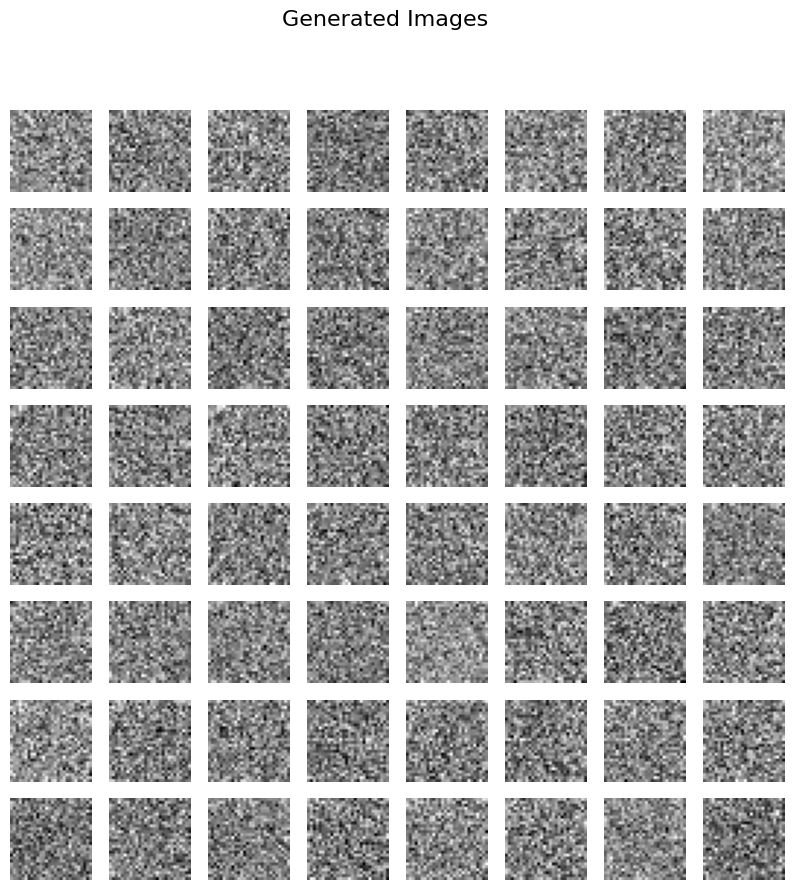

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torch.autograd as autograd
import matplotlib.pyplot as plt

# Define the Generator class
class Generator(nn.Module):
    def __init__(self, latent_dim: int):
        super().__init__()
        self.latent_dim = latent_dim
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(128, 784),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z)

# Define the Discriminator class
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Define the QGAN class
class QGAN(nn.Module):
    def __init__(self, latent_dim: int):
        super().__init__()
        self.generator = Generator(latent_dim)
        self.discriminator = Discriminator()

    def forward(self, z):
        fake_images = self.generator(z)
        return self.discriminator(fake_images)

# Generate images
real_images = torch.randn(64, 784)

# Instantiate the QGAN model
latent_dim = 100
qgan = QGAN(latent_dim)

autograd.set_detect_anomaly(True)

# Training loop
def train_qgan(qgan, optimizer, real_images, num_epochs=10):
    criterion = nn.BCELoss()

    for epoch in range(num_epochs):
        optimizer.zero_grad()

        # Generate fake images
        z = torch.randn(real_images.shape[0], latent_dim)
        fake_images = qgan.generator(z)

        # Discriminator loss
        real_output = qgan.discriminator(real_images)
        fake_output = qgan.discriminator(fake_images.detach())  # Detach to prevent gradient flow to generator
        discriminator_loss = criterion(real_output, torch.ones_like(real_output)) + criterion(fake_output, torch.zeros_like(fake_output))

        # Generator loss
        fake_output = qgan.discriminator(fake_images)
        generator_loss = criterion(fake_output, torch.ones_like(fake_output))

        # Update discriminator
        discriminator_loss.backward(retain_graph=True)
        optimizer.step()

        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch + 1}/{num_epochs}], Discriminator Loss: {discriminator_loss.item():.4f}, Generator Loss: {generator_loss.item():.4f}")

# Train the QGAN
optimizer = optim.Adam(qgan.parameters(), lr=0.0002, betas=(0.5, 0.999))
train_qgan(qgan, optimizer, real_images, num_epochs=50)
def display_images(images, title='Generated Images'):
    fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(28, 28), cmap='gray')
        ax.axis('off')
    plt.suptitle(title, fontsize=16)
    plt.show()

# Generate fake images after training
z = torch.randn(64, latent_dim)
fake_images = qgan.generator(z).detach().cpu().numpy()

# Display generated images
display_images(fake_images)


In this implementation, we'll create a Quantum Generative Adversarial Network (QGAN) to generate images from the CIFAR-10 dataset. CIFAR-10 consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. We'll train the QGAN to generate synthetic images that resemble the CIFAR-10 dataset.

Key Components:
Data Preparation:

We use torchvision to download and load the CIFAR-10 dataset. The images are normalized and transformed into tensors.
Generator Class:

Defines the generator neural network, which takes random noise vectors as input and generates fake images.
The generator consists of fully connected layers followed by ReLU activation functions and a final Tanh activation function to produce images in the range [-1, 1].
Discriminator Class:

Defines the discriminator neural network, which discriminates between real and fake images.
The discriminator is a standard feedforward neural network with LeakyReLU activation functions.
QGAN Class:

Combines the generator and discriminator into a single model.
Enables the training of the quantum generator using classical optimization techniques.
Training Loop:

Alternates between optimizing the quantum generator and classical discriminator using PyTorch's autograd.
Utilizes Binary Cross Entropy (BCE) loss for training.
Visualization:

After training, generates fake images using the quantum generator and displays them using matplotlib.
Steps:
Data Loading: Load the CIFAR-10 dataset using torchvision and prepare the data loaders.
Define Quantum Generator: Implement the quantum generator using TorchQuantum.
Define Classical Discriminator: Define a standard feedforward neural network as the discriminator.
Instantiate QGAN: Combine the quantum generator and classical discriminator into a QGAN model.
Training: Train the QGAN model using the defined training loop and optimizer.
Visualize Results: Display the generated images after training.

Files already downloaded and verified
Epoch [1/10], Step [100/782], Discriminator Loss: 0.0007, Generator Loss: 8.0235
Epoch [1/10], Step [200/782], Discriminator Loss: 0.0001, Generator Loss: 9.2437
Epoch [1/10], Step [300/782], Discriminator Loss: 0.0000, Generator Loss: 10.4017
Epoch [1/10], Step [400/782], Discriminator Loss: 0.0001, Generator Loss: 10.9309
Epoch [1/10], Step [500/782], Discriminator Loss: 0.0001, Generator Loss: 11.6247
Epoch [1/10], Step [600/782], Discriminator Loss: 0.0000, Generator Loss: 11.7662
Epoch [1/10], Step [700/782], Discriminator Loss: 0.0000, Generator Loss: 12.0124
Epoch [2/10], Step [100/782], Discriminator Loss: 0.0000, Generator Loss: 12.7942
Epoch [2/10], Step [200/782], Discriminator Loss: 0.0000, Generator Loss: 12.8110
Epoch [2/10], Step [300/782], Discriminator Loss: 0.0000, Generator Loss: 13.2765
Epoch [2/10], Step [400/782], Discriminator Loss: 0.0000, Generator Loss: 13.0511
Epoch [2/10], Step [500/782], Discriminator Loss: 0.0000, Gene

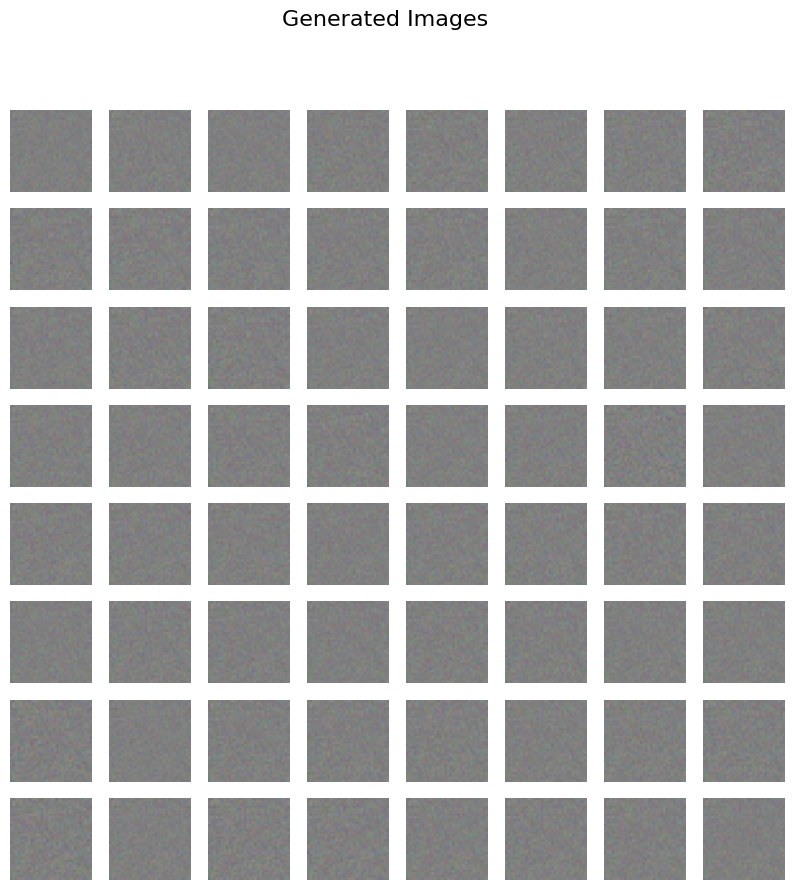

In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

# Transformations to apply to the images
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

# Define the Generator class
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()
        self.latent_dim = latent_dim
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 3072),  # 32x32x3
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z)

# Define the Discriminator class
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Define the QGAN class
class QGAN(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()
        self.generator = Generator(latent_dim)
        self.discriminator = Discriminator()

    def forward(self, z):
        fake_images = self.generator(z)
        return self.discriminator(fake_images)

# Training loop
def train_qgan(qgan, optimizer, train_loader, latent_dim, num_epochs=10):
    criterion = nn.BCELoss()

    for epoch in range(num_epochs):
        for i, (real_images, _) in enumerate(train_loader):
            real_images = real_images.view(-1, 3072)  # Flatten images
            real_images = real_images.to(device)

            # Generate fake images
            z = torch.randn(real_images.shape[0], latent_dim).to(device)
            fake_images = qgan.generator(z)

            # Discriminator loss
            real_output = qgan.discriminator(real_images)
            fake_output = qgan.discriminator(fake_images.detach())  # Detach to prevent gradient flow to generator
            discriminator_loss = criterion(real_output, torch.ones_like(real_output).to(device)) + criterion(fake_output, torch.zeros_like(fake_output).to(device))

            # Generator loss
            fake_output = qgan.discriminator(fake_images)
            generator_loss = criterion(fake_output, torch.ones_like(fake_output).to(device))

            # Update discriminator
            optimizer.zero_grad()
            discriminator_loss.backward(retain_graph=True)
            optimizer.step()



            if (i+1) % 100 == 0:
                print(f"Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(train_loader)}], Discriminator Loss: {discriminator_loss.item():.4f}, Generator Loss: {generator_loss.item():.4f}")

# Set device (GPU or CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Instantiate the QGAN model
latent_dim = 100
qgan = QGAN(latent_dim).to(device)

# Set up optimizer
optimizer = optim.Adam(qgan.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Train the QGAN
train_qgan(qgan, optimizer, train_loader, latent_dim, num_epochs=10)
# Generate fake images after training
with torch.no_grad():
    z = torch.randn(64, latent_dim).to(device)
    fake_images = qgan.generator(z)

# Reshape the images for plotting
fake_images = fake_images.view(-1, 3, 32, 32).cpu().numpy()
fake_images = np.transpose(fake_images, (0, 2, 3, 1))  # Change from (N, C, H, W) to (N, H, W, C)

# Plot the generated images
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow((fake_images[i] + 1) / 2)  # Rescale pixel values from [-1, 1] to [0, 1]
    ax.axis('off')
plt.suptitle('Generated Images', fontsize=16)
plt.show()